In [1]:
#Import das Libs
import matplotlib as mpl
import numpy as np
import math
import cv2 as cv
from matplotlib import pyplot as plot

In [2]:
#Realiza-se o Upload da Imagem para o Google Colab.
img_bin = cv.imread('/content/Fish (1).jpg',0)

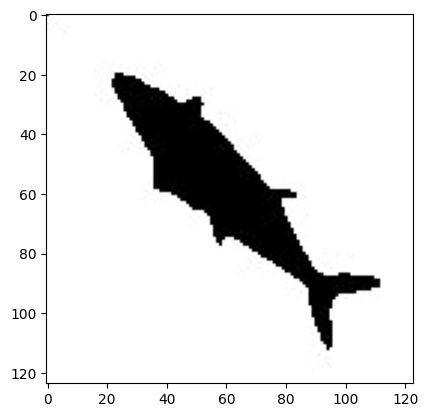

In [3]:
#Visualização da Imagem
plot.imshow(img_bin,cmap='gray')
plot.show()

In [4]:
#Binarização da Imagem
img_bin = cv.threshold(img_bin, 0, 255, cv.THRESH_OTSU)[1]

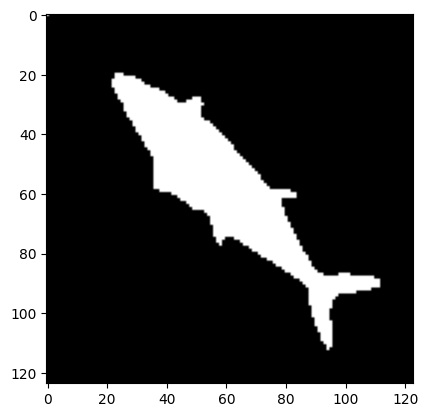

In [5]:
#Transformação em Negativo
img_bin = img_bin.max()-img_bin
plot.imshow(img_bin, cmap = 'gray')

In [6]:
#Coleta dos Momentos Centrais
M = cv.moments(img_bin)
print(M)

{'m00': 501075.0, 'm10': 30129270.0, 'm01': 29496360.0, 'm20': 2019824910.0, 'm11': 1964009745.0, 'm02': 1952097420.0, 'm30': 147847956540.0, 'm21': 143077788075.0, 'm12': 141032569755.0, 'm03': 141557085120.0, 'mu20': 208174137.69465664, 'mu11': 190415383.96183223, 'mu02': 215760038.8702291, 'mu30': 1362660587.588352, 'mu21': 1279383218.6271589, 'mu12': 1236348304.645765, 'mu03': 1242681456.572903, 'nu20': 0.0008291274700158284, 'nu11': 0.0007583969233869866, 'nu02': 0.0008593410168048056, 'nu30': 7.66709522273525e-06, 'nu21': 7.198529885526562e-06, 'nu12': 6.956391244104841e-06, 'nu03': 6.992025120455042e-06}


In [7]:
#Descobre-se o Centroide do objeto
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

60 58


In [8]:
#Em seguida, descobre-se a orientação do Objeto
lamb = np.sqrt( (M['mu20']-M['mu02'])**2 + 4*M['mu11']**2 )
tan_theta = (M['mu02']-M['mu20'] - 2*M['mu11'] + lamb) / (M['mu02']-M['mu20'] + 2*M['mu11'] - lamb)
theta = math.pi-math.atan(tan_theta)
ang=theta/math.pi*180.0
if(ang>180): ang=ang-180

Angulo de orientação do objeto = 134.42942812677452


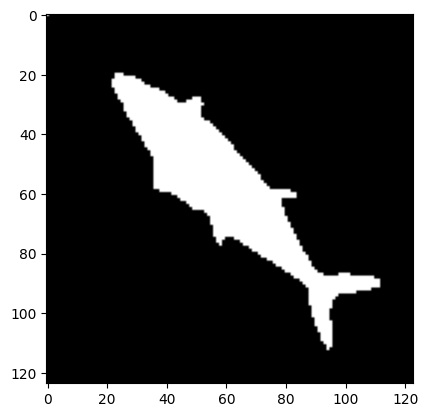

In [9]:
#Exibição dos Resultados (Ângulo do Objeto)
plot.imshow(img_bin, cmap = 'gray')
print('Angulo de orientação do objeto =',ang)

In [10]:
#Descobrindo os Momentos de Hu da Imagem

In [11]:
#Supressão dos números em notação científica
np.set_printoptions(suppress=True)

In [12]:
# Calcula Momentos de Hu
momHu = cv.HuMoments(M)

In [13]:
#Aplica transformação de Log ara deixar todos os valores na mesma escala (range)
momHuT = -np.sign(momHu)*np.log10(np.abs(momHu))

In [14]:
#Exibe-se os Momentos de Hu
print(momHuT)

[[  2.77250704]
 [  5.6379746 ]
 [  9.4116622 ]
 [  9.38172361]
 [ 18.77842259]
 [ 12.20125323]
 [-21.055073  ]]
